visualize variance explained at each step

---

In [1]:
import utils
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import colors as mc
%matplotlib inline

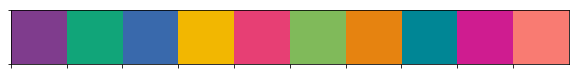

In [2]:
color_list = utils.palettable.cartocolors.qualitative.Bold_10.mpl_colors
sns.palplot(color_list)

In [3]:
purple_color = '#A575B0'
my_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#ffffff', purple_color], N=30)

In [4]:
color_index = 0
my_color = color_list[color_index]
my_cmap = mc.LinearSegmentedColormap.from_list('my_cmap', ['#EDEDED', my_color], N=30)

---

#### stackoverflow (subset)

##### feature importance

In [320]:
ylab_list = ['Signup Duration', 'Signup Percentile', 'Reputation',
             '# of Ans. Before', 'Code Lines', 'Words', 'URLs',
             'Time Since Prev. Ans.', 'Ans. Position', 'Session Len.',
             'Readability', 'Images',
            ]

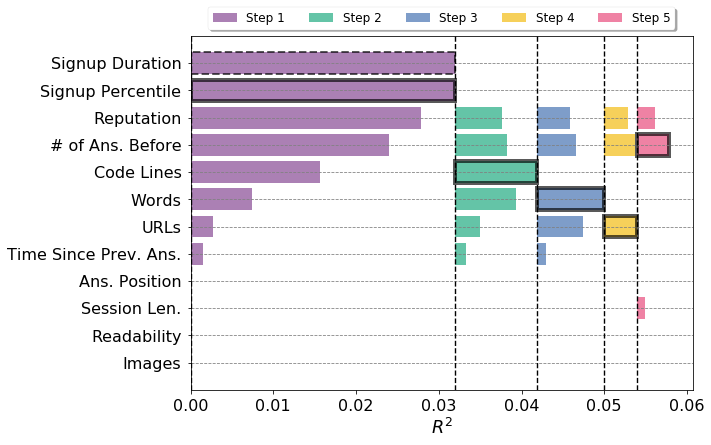

In [321]:
data_name = 'stackoverflow_cleaned_subset'
split_version = 1
model_folder = 'models/{}/{}/'.format(data_name, split_version)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(9, 6.5), 
                                    color_list=color_list, bar_alpha=0.65)
mapping = dict(zip([t.get_text() for t in ax.get_yticklabels()[::-1]], ylab_list))
_ = ax.set_yticklabels(ylab_list[::-1])

##### feature network

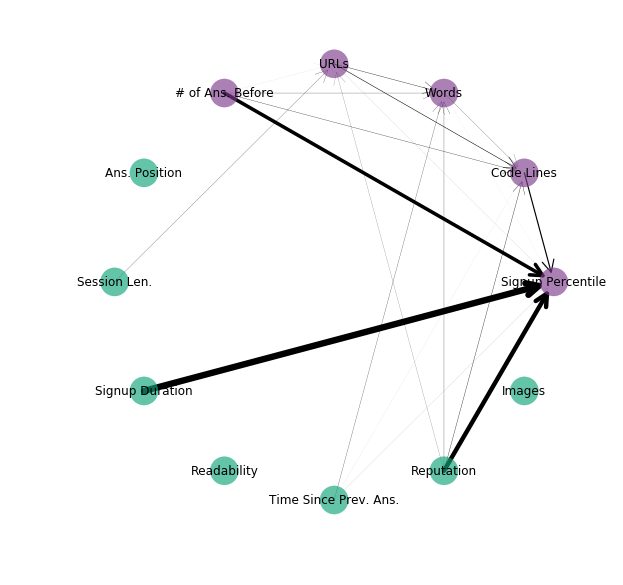

In [322]:
net, (fig, ax) = utils.visualize_feature_network(model_folder=model_folder, w_scale=200, arrowsize=30,
                                                 node_kwargs={'alpha': 0.65}, label_kwargs={'labels': mapping},
                                                 color_choice=dict(zip(['selected', 'unselected', 'isolated'], 
                                                                       color_list[:3])))
xmin, xmax = ax.get_xlim()
ax.set_xlim([xmin*1.05, xmax*1.05])
ymin, ymax = ax.get_ylim()
_ = ax.set_ylim([ymin*1.03, ymax*1.03])

##### distribution

###### 1d

In [323]:
dim = 1
#thres = 0.179732
thres = 0.5
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)
splits_at_dim

[[-7.49574e-08, 0.307653, 0.566978, 0.704929, 1.0]]

[Text(0,0,'15'), Text(0,0,'25'), Text(0,0,'35')]

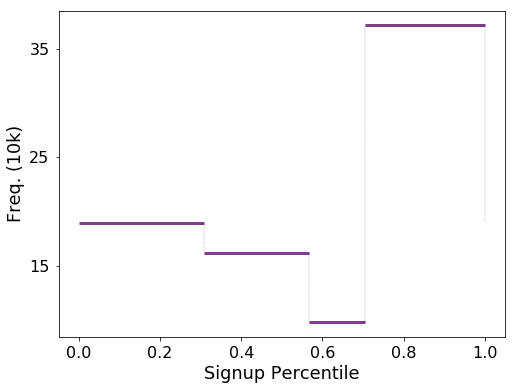

In [324]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, N_dim, 
                                       xlab=chosen_f_dim[0], 
                                       #ylab=r'$Freq.$',
                                       ylab='Freq. (10k)',
                                       xscale='linear', yscale='linear',
                                       hlines_kwargs={'color': color_list[0], 'linewidth': 3}
                                      )
ax.set_xlabel('Signup Percentile')
ax.set_yticks([int(i*1e4) for i in [15, 25, 35]])
ax.set_yticklabels([15, 25, 35])

Text(0.5,0,'Signup Percentile')

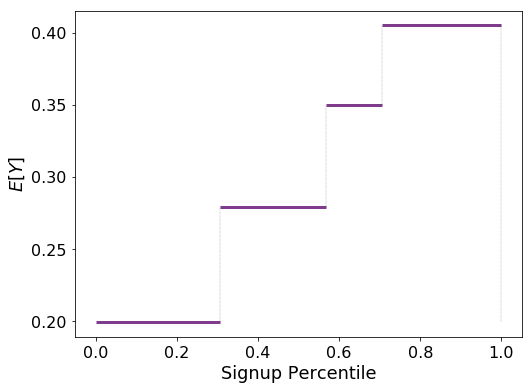

In [325]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, intensity_dim, 
                                       xlab=chosen_f_dim[0], ylab=r'$E[Y]$',
                                       xscale='linear', yscale='linear',
                                       hlines_kwargs={'color': color_list[0], 'linewidth': 3}
                                      )
ax.set_xlabel('Signup Percentile')

In [326]:
feature_list = ['Signup Percentile', 'Code Lines', 'Words', 'URLs']

###### 2d

In [327]:
dim = 2
#thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [328]:
chosen_f_dim

array(['percentile', 'code_lines'], dtype=object)

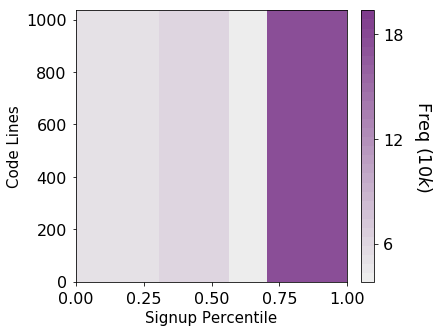

In [329]:
cbar_ticks = (pd.np.array([6, 12, 18])*1e4).astype(int)
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap,
                                            N_dim, 'Freq ($10k$)', feature_list,
                                            unit_w=6, unit_h=5,
                                            xbins_lab_decimal=0, #norm_func=mc.LogNorm,
                                            xscale='linear', yscale='linear',
                                            #xlab_x=0.4, xlab_y=-0.15,
                                            ylab_x=-0.08,
                                            cb_kwargs={'ticks': cbar_ticks},
                                           )
cb.set_ticklabels(cbar_ticks//(10000))

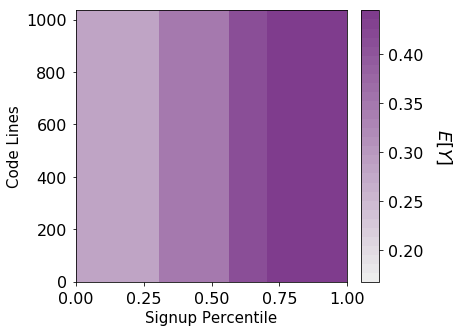

In [330]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=6, unit_h=5,
                                            xbins_lab_decimal=0,
                                            xscale='linear', yscale='linear',
                                            #xlab_x=0.4, xlab_y=-0.15,
                                           )

###### 3d

In [331]:
dim = 3
#thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [332]:
chosen_f_dim

array(['percentile', 'code_lines', 'words'], dtype=object)

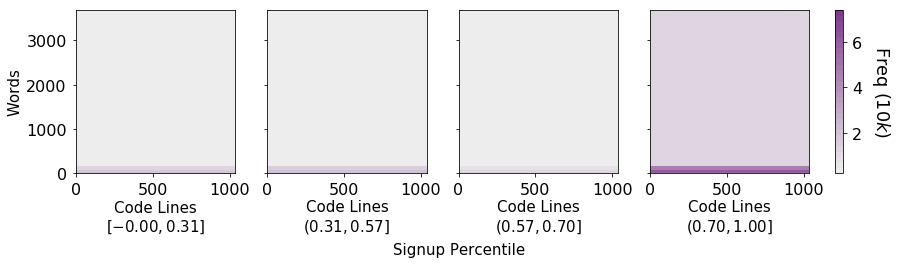

In [333]:
cbar_ticks = (pd.np.array([2, 4, 6])*1e4).astype(int)
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap,
                                            N_dim, 'Freq ($10k$)', feature_list,
                                            unit_w=4, unit_h=3,
                                            xbins_lab_decimal=2, #norm_func=mc.LogNorm,
                                            xscale='linear', yscale='linear',
                                            xlab_x=0.4, xlab_y=-0.25, ylab_x=-0.08,
                                            cb_kwargs={'ticks': cbar_ticks},
                                           )
cb.set_ticklabels(cbar_ticks//(10000))

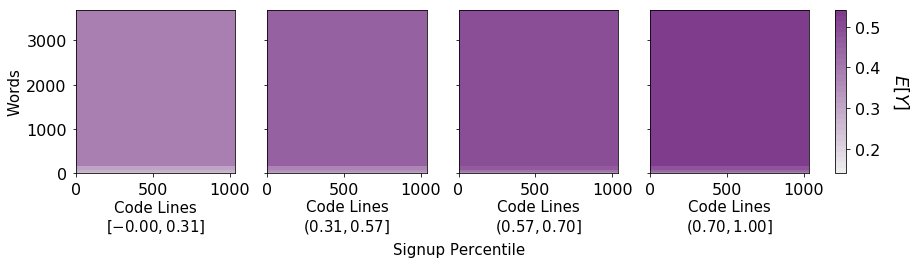

In [334]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap,
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=4, unit_h=3,
                                            xbins_lab_decimal=2,
                                            xscale='linear', yscale='linear',
                                            xlab_x=0.4, xlab_y=-0.25, ylab_x=-0.08,
                                           )
cb.set_ticks([0.1, 0.2, 0.3, 0.4, 0.5])

###### 4d

In [340]:
dim = 4
#thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)
splits_at_dim

[[-7.49574e-08, 0.307653, 0.566978, 0.704929, 1.0],
 [0.0, 0.0, 1037.0],
 [0.0, 30.0, 72.0, 175.0, 3696.0],
 [0.0, 0.0, 87.0]]

In [341]:
chosen_f_dim

array(['percentile', 'code_lines', 'words', 'urls'], dtype=object)

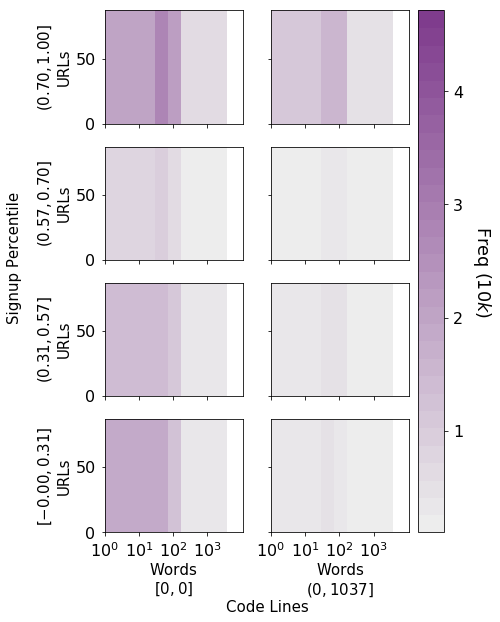

In [346]:
cbar_ticks = (pd.np.array([1,2,3,4])*1e4).astype(int)
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            N_dim, 'Freq ($10k$)', feature_list,
                                            xbins_lab_decimal=0,
                                            yscale='linear', #xscale='linear',
                                            #xlab_x=0.4, xlab_y=-0.15,
                                            ylab_x=-0.08,
                                            cb_kwargs={'ticks': cbar_ticks},
                                           )
cb.set_ticklabels(cbar_ticks//(10000))
for ax in ax_arr.flat:
    #ax.set_ylabel('')
    #ax.set_yticklabels([])
    ax.set_xticks([1, 10, 100, 1000])

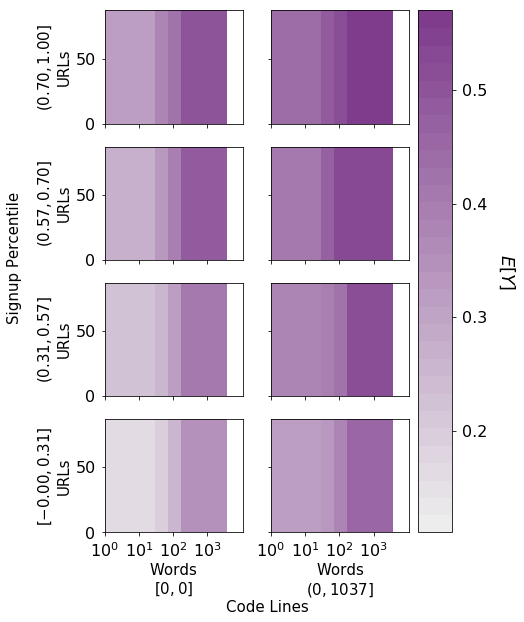

In [344]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            xbins_lab_decimal=0,
                                            yscale='linear',# xscale='linear',
                                            #xlab_x=0.4, xlab_y=-0.15,
                                            ylab_x=-0.08,
                                           )
for ax in ax_arr.flat:
    #ax.set_ylabel('')
    #ax.set_yticklabels([])
    ax.set_xticks([1, 10, 100, 1000])
    
#_ = fig.texts[1].set_visible(False)

---

#### khan

##### feature importance

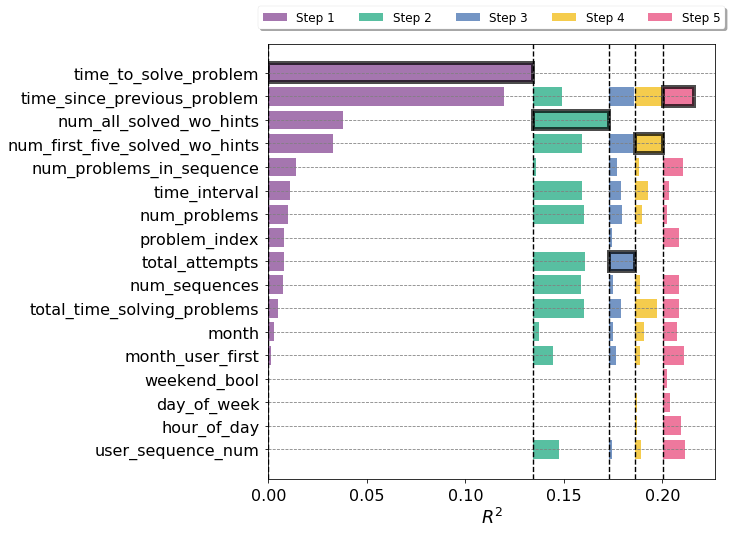

In [302]:
data_name = 'khan_cleaned'
split_version = 3
model_folder = 'models/{}/{}/'.format(data_name, split_version)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 8), 
                                    color_list=color_list, bar_alpha=0.7)

In [303]:
feature_list = ['Solve Time', 'w/o Hints', 'Total Attempts', 'w/o Hints (5)']

##### distribution

###### 1d

In [304]:
dim = 1
#thres = 0.179732
thres = 0.5
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)
splits_at_dim

[[0.0, 0.0, 6.0, 11.0, 17.0, 26.0, 41.0, 68.0, 157.0, 1709650.0]]

In [305]:
chosen_f_dim

array(['time_to_solve_problem'], dtype=object)

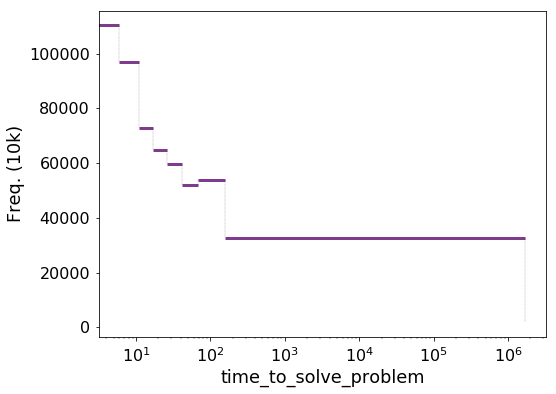

In [306]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, N_dim, 
                                       xlab=chosen_f_dim[0], 
                                       ylab='Freq. (10k)',
                                       xscale='log', yscale='linear',
                                       hlines_kwargs={'color': color_list[0], 'linewidth': 3}
                                      )

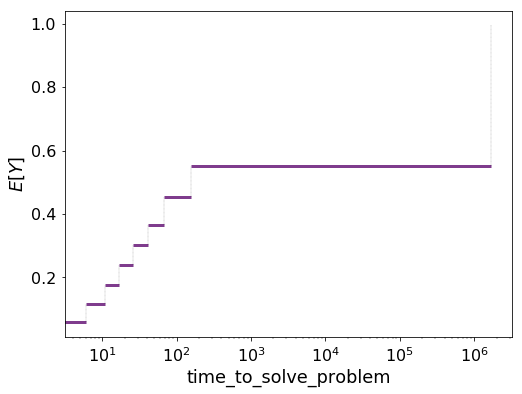

In [307]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, intensity_dim, 
                                       xlab=chosen_f_dim[0], ylab=r'$E[Y]$',
                                       yscale='linear',
                                       hlines_kwargs={'color': color_list[0], 'linewidth': 3}
                                      )

###### 2d

In [308]:
dim = 2
#thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [309]:
splits_at_dim

[[0.0, 0.0, 6.0, 11.0, 17.0, 26.0, 41.0, 68.0, 157.0, 1709650.0],
 [0.0, 1.0, 3.0, 631.0, 3763.0, 13348.0]]

In [310]:
chosen_f_dim

array(['time_to_solve_problem', 'num_all_solved_wo_hints'], dtype=object)

(1, 10000)

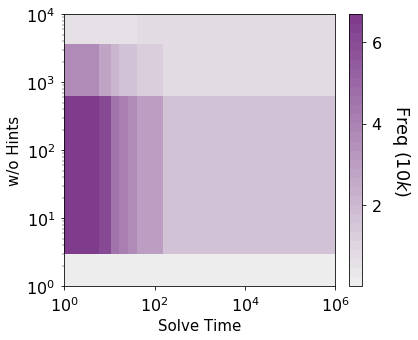

In [311]:
cbar_ticks = (pd.np.array([2, 4, 6])*1e4).astype(int)
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap,
                                            N_dim, 'Freq ($10k$)', feature_list,
                                            unit_w=6, unit_h=5,
                                            cb_kwargs={'ticks': cbar_ticks},
                                           )
cb.set_ticklabels(cbar_ticks//(10000))
#ax_arr[0,0].set_xticks([10**(i) for i in range(0, 7, 2)])
ax_arr[0,0].set_xlim(1, 10**6)
ax_arr[0,0].set_ylim(1, 10**4)
#ax_arr[0,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

(1, 10000)

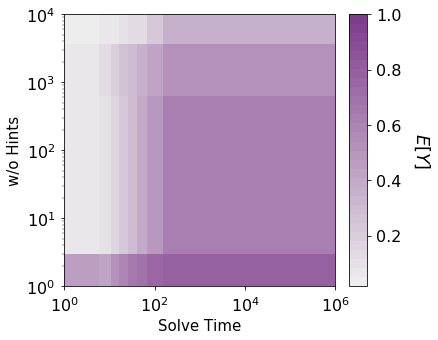

In [312]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=6, unit_h=5,
                                           )
ax_arr[0,0].set_xlim(1, 10**6)
ax_arr[0,0].set_ylim(1, 10**4)

###### 3d

In [313]:
dim = 3
#thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [314]:
chosen_f_dim

array(['time_to_solve_problem', 'num_all_solved_wo_hints', 'total_attempts'], dtype=object)

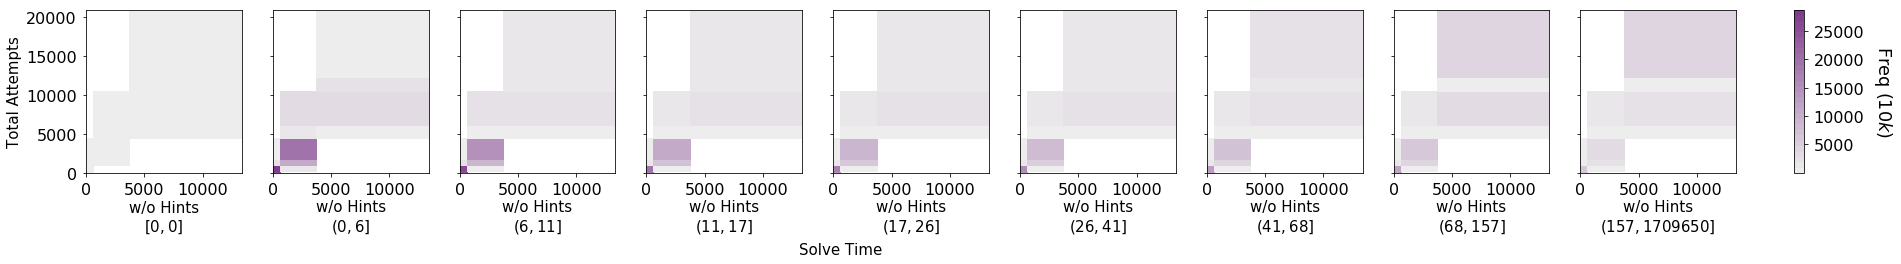

In [315]:
#cbar_ticks = (pd.np.array([2, 4, 6])*1e4).astype(int)
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap,
                                            N_dim, 'Freq ($10k$)', feature_list,
                                            unit_w=4, unit_h=3,
                                            xbins_lab_decimal=0, #norm_func=mc.LogNorm,
                                            xscale='linear', yscale='linear',
                                            xlab_x=0.4, xlab_y=-0.25, ylab_x=-0.08,
                                            #cb_kwargs={'ticks': cbar_ticks},
                                           )
#cb.set_ticklabels(cbar_ticks//(10000))

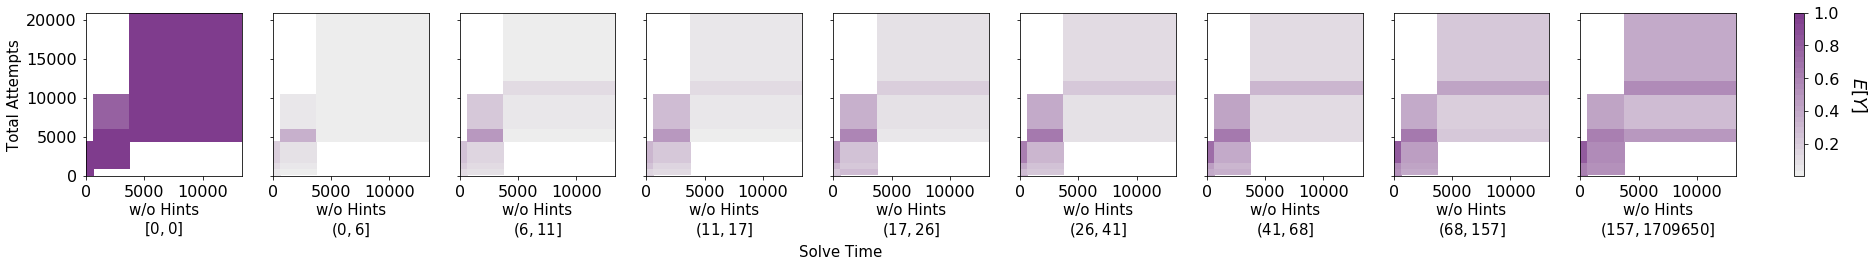

In [316]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap,
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=4, unit_h=3,
                                            xbins_lab_decimal=0,
                                            xscale='linear', yscale='linear',
                                            xlab_x=0.4, xlab_y=-0.25, ylab_x=-0.08,
                                           )

###### 4d

In [317]:
dim = 4
#thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

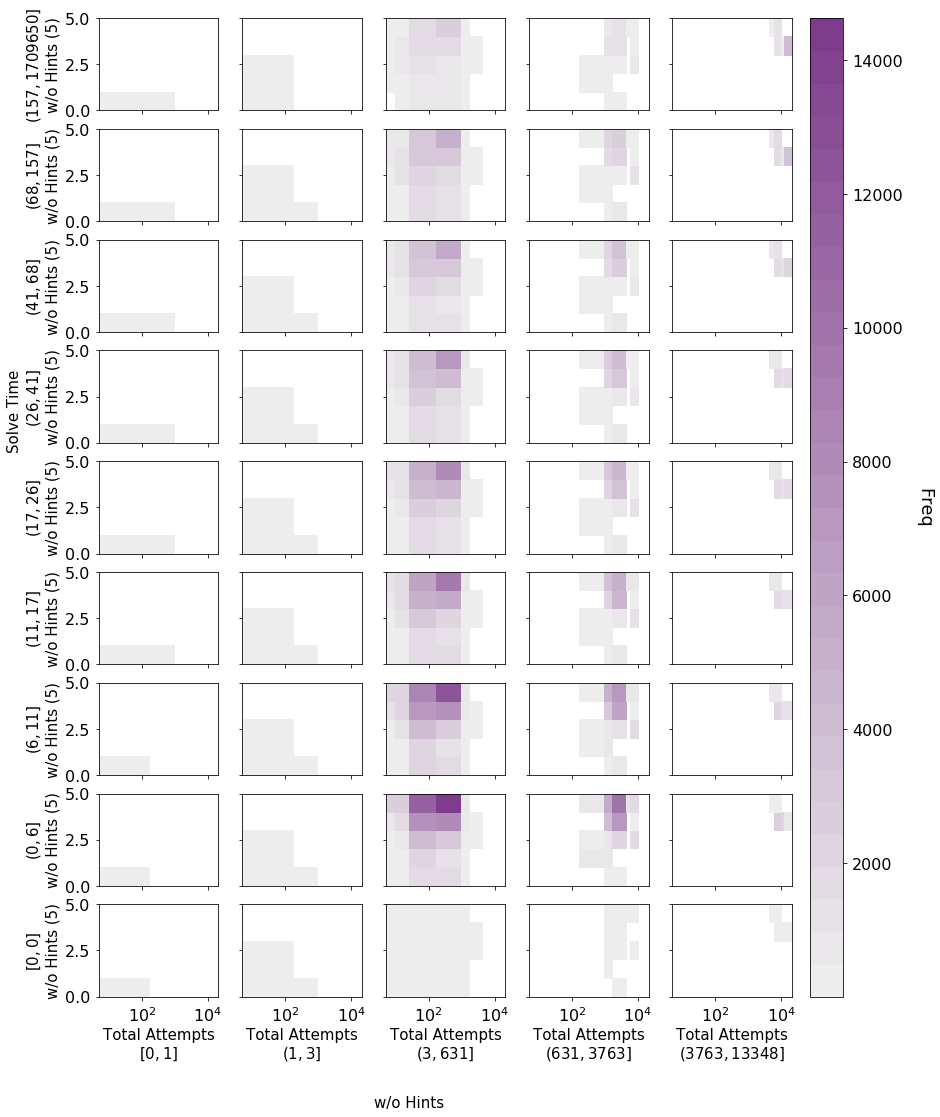

In [318]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            N_dim, 'Freq', feature_list,
                                            unit_w=3, unit_h=2,
                                            xbins_lab_decimal=0,
                                            ybins_lab_decimal=0,
                                            yscale='linear', #xscale='linear',
                                            #xlab_x=0.4, xlab_y=-0.15,
                                            ylab_x=0.04, xlab_y=0.04,
                                            cb_kwargs={'aspect': 30},
                                           )

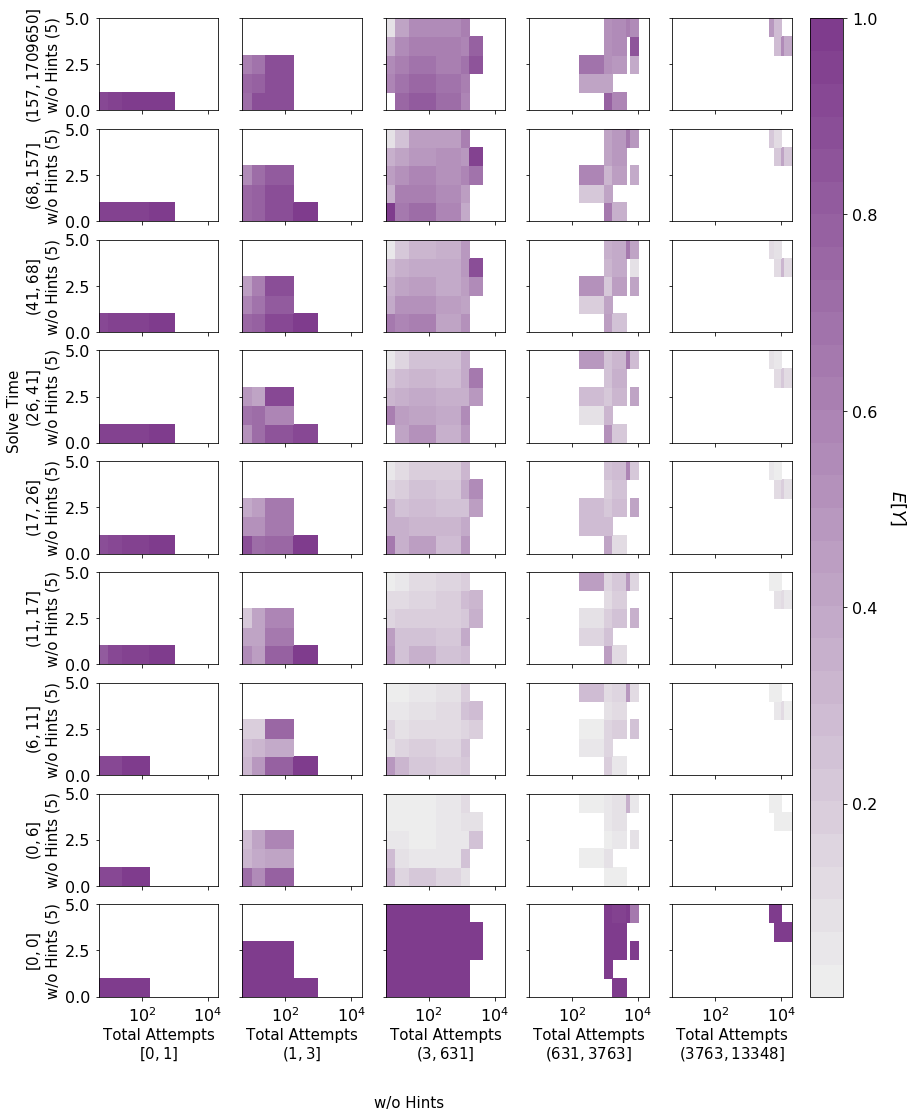

In [319]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=3, unit_h=2,
                                            xbins_lab_decimal=0,
                                            ybins_lab_decimal=0,
                                            yscale='linear', #xscale='linear',
                                            #xlab_x=0.4, xlab_y=-0.15,
                                            ylab_x=0.04, xlab_y=0.04,
                                            cb_kwargs={'aspect': 30},
                                           )

---

#### duolingo

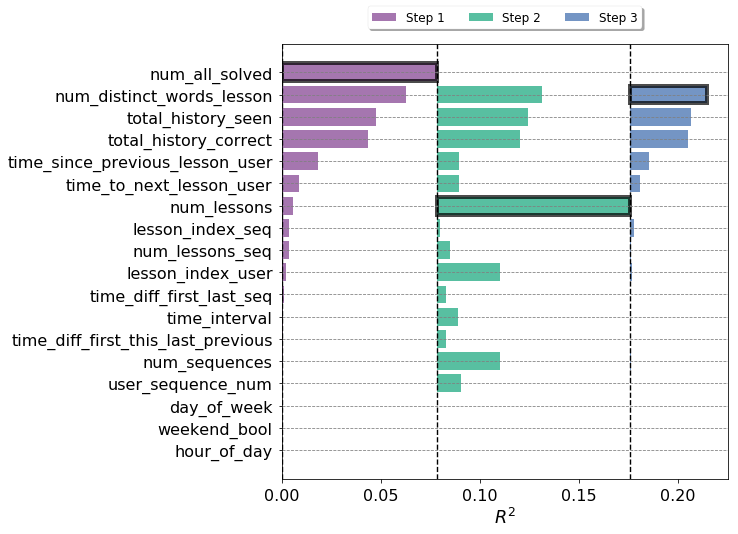

In [98]:
data_name = 'duolingo_cleaned'
split_version = 4
model_folder = 'models/{}/{}/'.format(data_name, split_version)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 8), 
                                    color_list=color_list, bar_alpha=0.7)

---

#### digg

##### feature importance

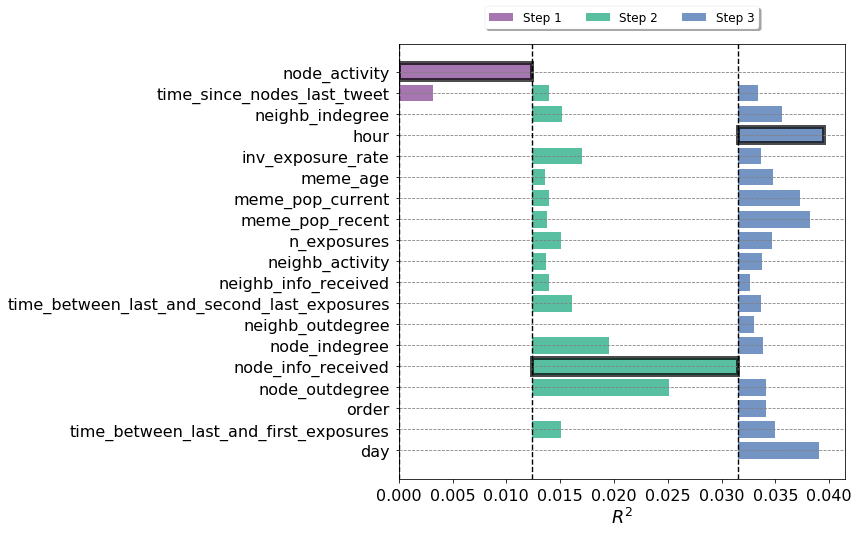

In [5]:
data_name = 'digg'
split_version = 4
model_folder = 'models/{}/{}/'.format(data_name, split_version)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 8), 
                                    color_list=color_list, bar_alpha=0.7)

In [6]:
feature_list = ['User Activity', 'Info Received', 'Hour']

##### feature network

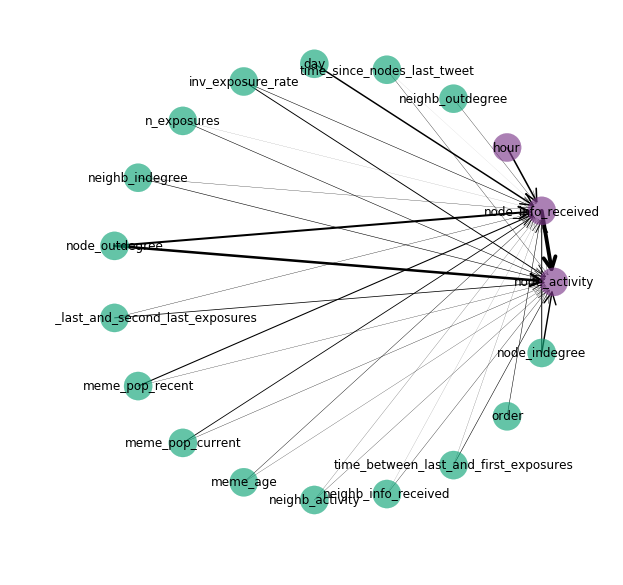

In [7]:
net, (fig, ax) = utils.visualize_feature_network(model_folder=model_folder, w_scale=200, arrowsize=30,
                                                 node_kwargs={'alpha': 0.65}, #label_kwargs={'labels': mapping},
                                                 color_choice=dict(zip(['selected', 'unselected', 'isolated'], 
                                                                       color_list[:3])))
xmin, xmax = ax.get_xlim()
ax.set_xlim([xmin*1.05, xmax*1.05])
ymin, ymax = ax.get_ylim()
_ = ax.set_ylim([ymin*1.03, ymax*1.03])

##### distribution

###### 1d

In [8]:
dim = 1
#thres = 0.179732
thres = 0.5
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

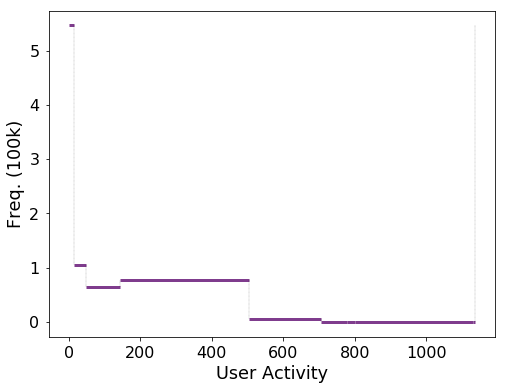

In [9]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, N_dim, 
                                       xlab=feature_list[0], 
                                       #xlab=chosen_f_dim[0], 
                                       #ylab=r'$Freq.$',
                                       ylab='Freq. (100k)',
                                       xscale='linear', yscale='linear',
                                       hlines_kwargs={'color': color_list[0], 'linewidth': 3}
                                      )
#ax.set_xlabel('Signup Percentile')
ax.set_yticks([int(i*1e5) for i in range(6)])
_ = ax.set_yticklabels(pd.np.arange(6))

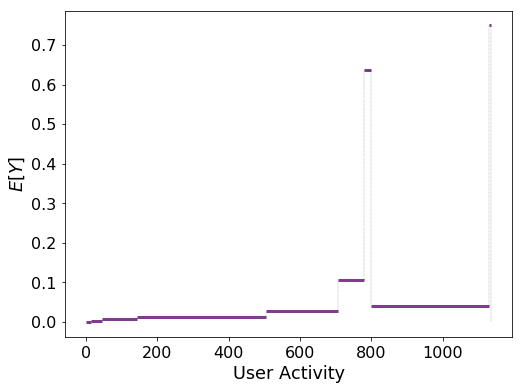

In [10]:
fig, ax = utils.visualize_s3d_model_1d(splits_at_dim, intensity_dim, 
                                       xlab=feature_list[0], ylab=r'$E[Y]$',
                                       xscale='linear', yscale='linear',
                                       hlines_kwargs={'color': color_list[0], 'linewidth': 3}
                                      )

###### 2d

In [11]:
dim = 2
thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [12]:
chosen_f_dim

array(['node_activity', 'node_info_received'], dtype=object)

In [13]:
splits_at_dim

[[0.0, 14.0, 47.0, 143.0, 505.0, 707.0, 778.0, 800.0, 1130.0, 1136.0],
 [0.0, 37.0, 159.0, 1371.0, 10093.0, 126022.0]]

In [14]:
cb_ticks = pd.np.array([1, 2, 3])*(10**5)
cb_kwargs ={'aspect': 15, 'ticks': cb_ticks}

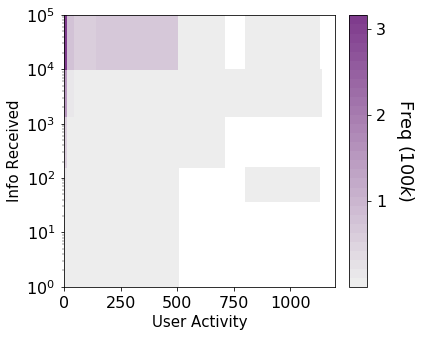

In [15]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            N_dim, 'Freq ($100k$)', feature_list,
                                            unit_w=6, unit_h=5,
                                            yscale='log', xscale='linear',
                                            cb_kwargs=cb_kwargs,
                                           )
ax_arr[0,0].set_xlim(0, 1200)
ax_arr[0,0].set_ylim(1, 10**5)
cb.set_ticklabels(cb_ticks//(10**5))
#fig.texts[0].set_visible(False)

In [16]:
cb_kwargs ={'aspect': 15, 'ticks': [0.1, 0.3, 0.5 , .7, .9]}

(1, 100000)

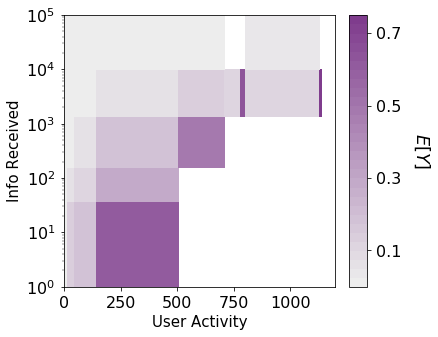

In [17]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            unit_w=6, unit_h=5,
                                            xbins_lab_decimal=0,
                                            yscale='log', xscale='linear',
                                            cb_kwargs=cb_kwargs,
                                           )
ax_arr[0,0].set_xlim(0, 1200)
ax_arr[0,0].set_ylim(1, 10**5)
#for ax in ax_arr.flat:
#    ax.set_ylabel('')
#    ax.set_yticklabels([])

###### 3d

In [18]:
dim = 3
thres = 0.179732
splits_at_dim, N_dim, intensity_dim, pred_dim, chosen_f_dim = utils.visualize_s3d_model_reader(model_folder, dim, thres)

In [19]:
chosen_f_dim

array(['node_activity', 'node_info_received', 'hour'], dtype=object)

In [26]:
cb_ticks = pd.np.arange(2,11,2)*(10**4)
cb_kwargs ={'aspect': 15, 'ticks': cb_ticks}

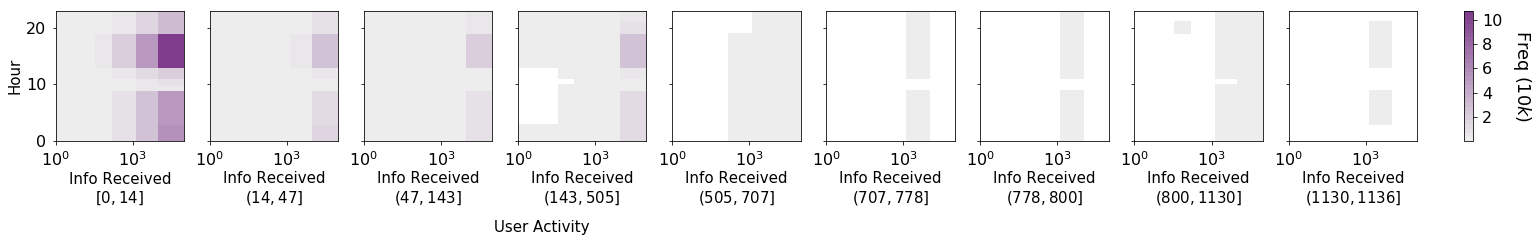

In [30]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            N_dim, 'Freq ($10k$)', feature_list,
                                            xbins_lab_decimal=0,
                                            yscale='linear', #xscale='linear',
                                            #xlab_x=0.4, xlab_y=-0.15,
                                            cb_kwargs=cb_kwargs,
                                            ylab_x=-0.08,
                                           )
#fig.texts[0].set_visible(False)
cb.set_ticklabels(cb_ticks//(10**4))
for ax in ax_arr.flat:
    ax.set_xlim(1, 10**5)

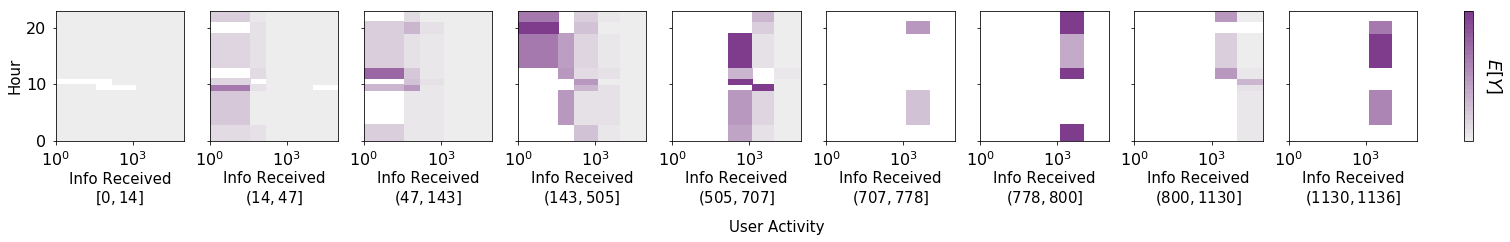

In [32]:
fig, ax_arr, cb = utils.visualize_s3d_model(dim, splits_at_dim, my_cmap, 
                                            intensity_dim, '$E[Y]$', feature_list,
                                            xbins_lab_decimal=0,
                                            yscale='linear', #xscale='linear',
                                            xlab_x=0.44, #xlab_y=-0.15,
                                            cb_kwargs=cb_kwargs,
                                            ylab_x=-0.08,
                                           )
cb.set_ticklabels(cb_ticks//(10**4))
for ax in ax_arr.flat:
    ax.set_xlim(1, 10**5)
#for ax in ax_arr.flat:
#    ax.set_ylabel('')
#    ax.set_yticklabels([])

---

#### twitter

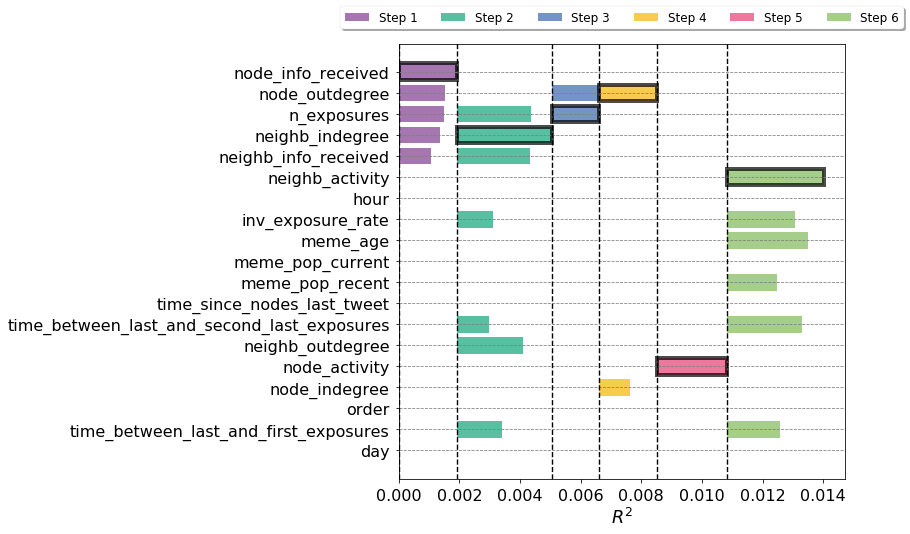

In [39]:
data_name = 'twitter'
split_version = 4
model_folder = 'models/{}/{}/'.format(data_name, split_version)
fig, ax = utils.visualize_s3d_steps(model_folder, figsize=(8, 8), 
                                    color_list=color_list, bar_alpha=0.7)